In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [56]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")

In [57]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [59]:
df.shape

(1000, 40)

In [60]:
# Date column acts as an object, so convert it into datetime datatype.
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['policy_year']=df['policy_bind_date'].dt.year

In [61]:
df.drop(['policy_bind_date'],axis=1,inplace=True)


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [63]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39', 'policy_year'],
      dtype='object')

### Checking for Null Values

In [64]:
df.isin(['?']).sum().any()

True

In [65]:
df.replace('?',np.nan,inplace=True)

months_as_customer                0
age                               0
policy_number                     0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                  178
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                 360
bodily_injuries             

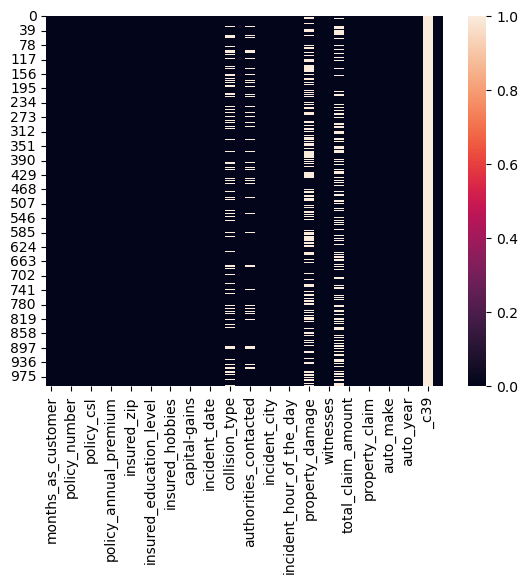

In [66]:
sns.heatmap(df.isna())
df.isna().sum()

In [67]:
df.drop(['_c39'] ,axis=1 ,inplace = True) #since column is empty

### Treating Null values

In [68]:
df['collision_type'].fillna(value=df['collision_type'].mode()[0], inplace= True)
df['property_damage'].fillna(value=df['property_damage'].mode()[0], inplace= True)
df['police_report_available'].fillna(value=df['police_report_available'].mode()[0], inplace= True)

In [69]:
df.isna().sum().any()

True

## Exploratory Data Analysis

### Univariate Analysis

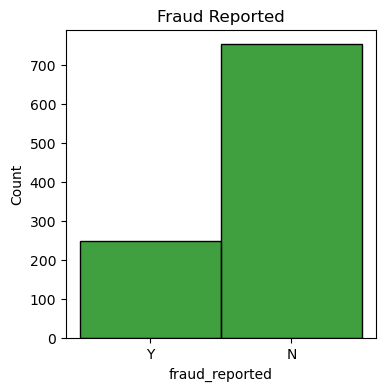

In [70]:
plt.figure(figsize=(4,4))
sns.histplot(df['fraud_reported'],color='g')
plt.title('Fraud Reported')
plt.show()

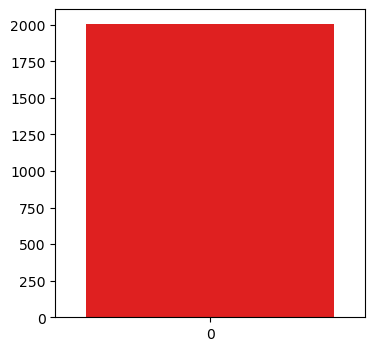

In [71]:
plt.figure(figsize=(4,4))
sns.barplot(df['auto_year'],color='r')
plt.show()

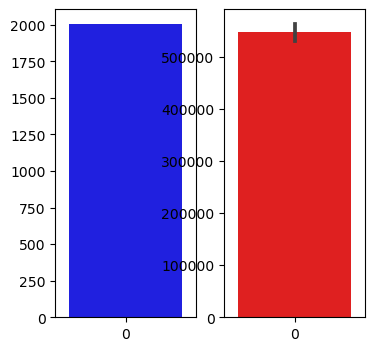

In [72]:
plt.figure(figsize=(4,4))
plt.subplot(1,2,1)
sns.barplot(df['auto_year'],color='b')
plt.subplot(1,2,2)
sns.barplot(df['policy_number'],color='r')
plt.show()

In [73]:
df.drop(['auto_year','policy_number'],axis=1,inplace=True)


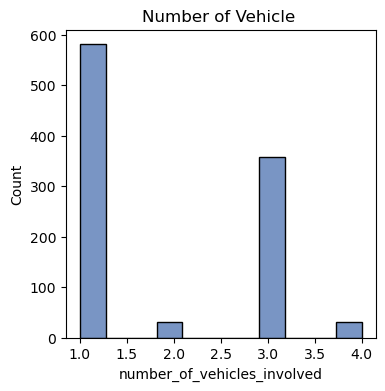

In [74]:
plt.figure(figsize=(4,4))
sns.histplot(df['number_of_vehicles_involved'])
plt.title('Number of Vehicle ')
plt.show()

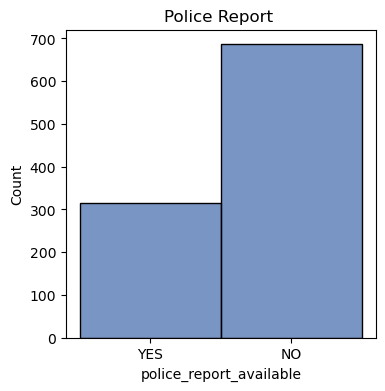

In [75]:
plt.figure(figsize=(4,4))
sns.histplot(df['police_report_available'])
plt.title('Police Report ')
plt.show()

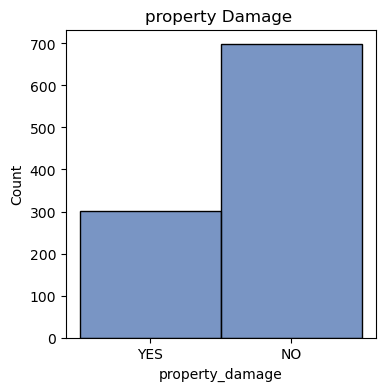

In [76]:
plt.figure(figsize=(4,4))
sns.histplot(df['property_damage'])
plt.title('property Damage ')
plt.show()

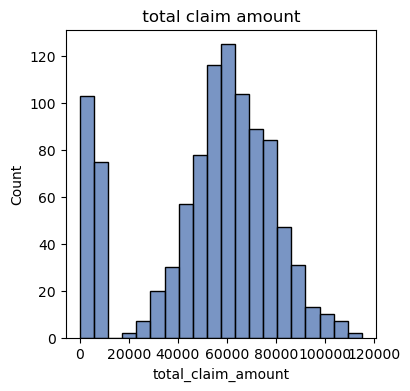

In [77]:
plt.figure(figsize=(4,4))
sns.histplot(df['total_claim_amount'])
plt.title(' total claim amount ')
plt.show()

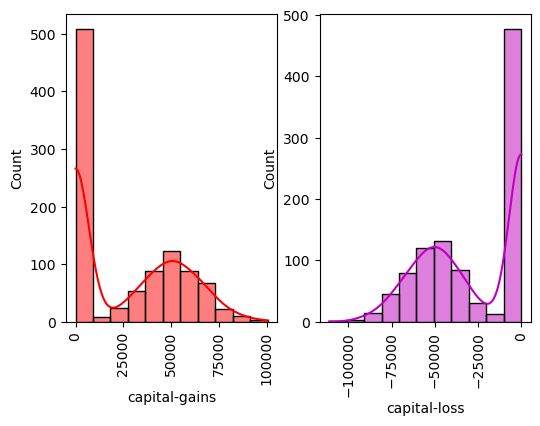

In [78]:
plt.figure(figsize=(6,4))
plt.subplot(1,2,1)
sns.histplot(df['capital-gains'],kde=True,color='r')
plt.xticks(fontsize=10,rotation=90)
plt.subplot(1,2,2)
sns.histplot(df['capital-loss'],kde=True,color='m')
plt.xticks(fontsize=10,rotation=90)
plt.show()

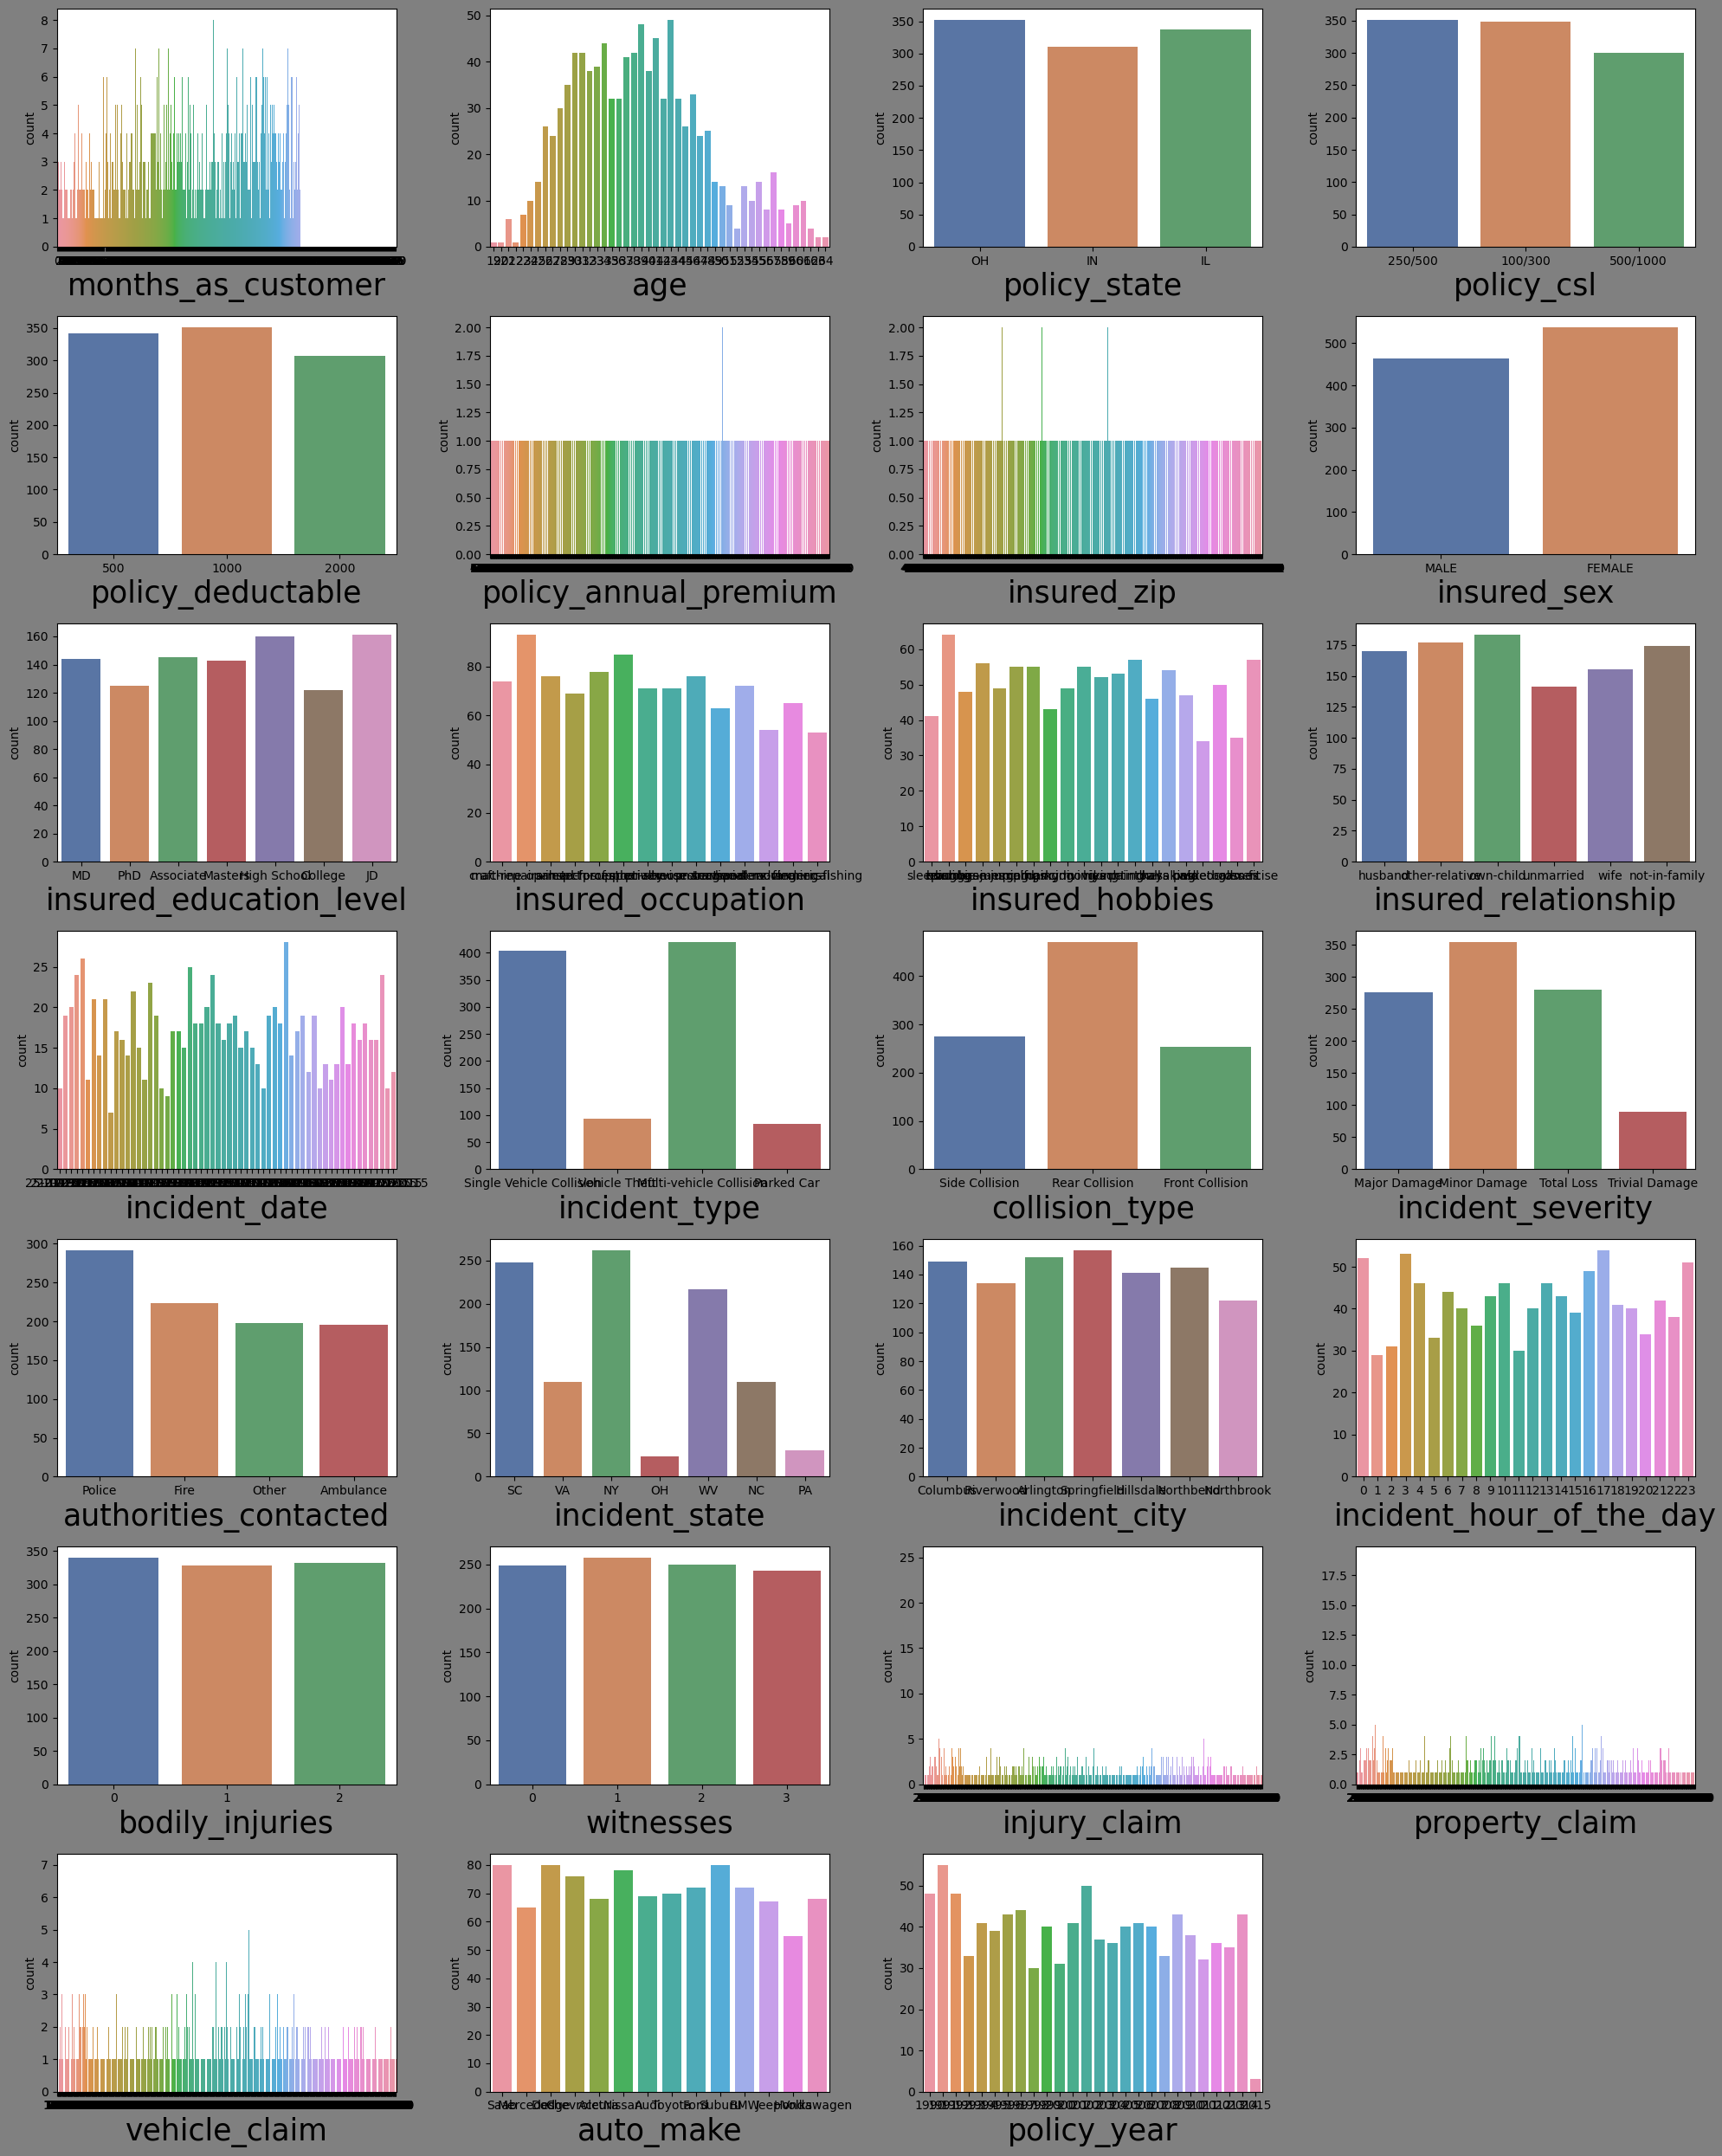

In [79]:
sns.set_palette('deep')
plt.figure(figsize=(20,25), facecolor='grey')

categories =['months_as_customer', 'age', 
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship','incident_date', 'incident_type', 'collision_type',
       'incident_severity','authorities_contacted', 'incident_state', 'incident_city',
        'incident_hour_of_the_day','bodily_injuries','witnesses', 
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make','policy_year']

for i, category in enumerate(categories, 1):
    plt.subplot(7, 4, i)
    sns.countplot(data=df, x=category)
    plt.xlabel(category, fontsize=25)

plt.tight_layout()
plt.show()

### Bivariate Analysis

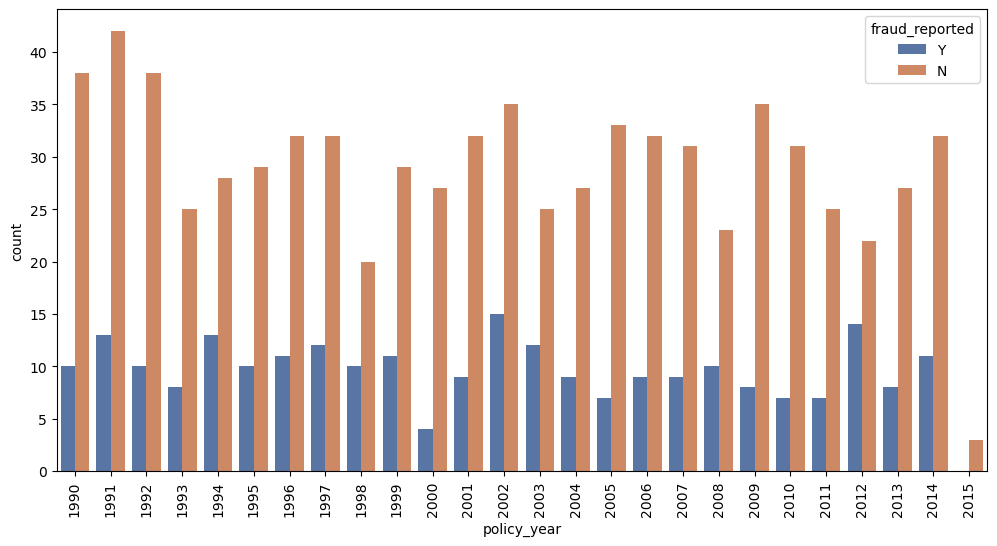

In [80]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='policy_year', hue='fraud_reported')
plt.xticks(fontsize=10,rotation=90)
plt.show()

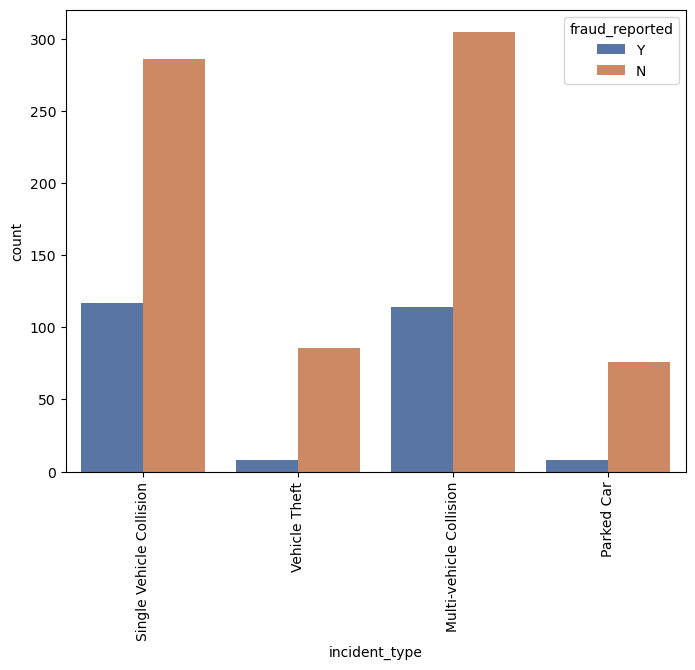

In [81]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='incident_type', hue='fraud_reported')
plt.xticks(fontsize=10,rotation=90)
plt.show()

## Statistical Analysis

In [82]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [83]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_state,1000.0,1.014000e+00,8.309600e-01,0.00,0.0000,1.0,2.000,2.00
policy_csl,1000.0,9.510000e-01,8.045162e-01,0.00,0.0000,1.0,2.000,2.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
insured_sex,1000.0,4.630000e-01,4.988786e-01,0.00,0.0000,0.0,1.000,1.00
insured_education_level,1000.0,2.966000e+00,1.948497e+00,0.00,1.0000,3.0,5.000,6.00


<Axes: >

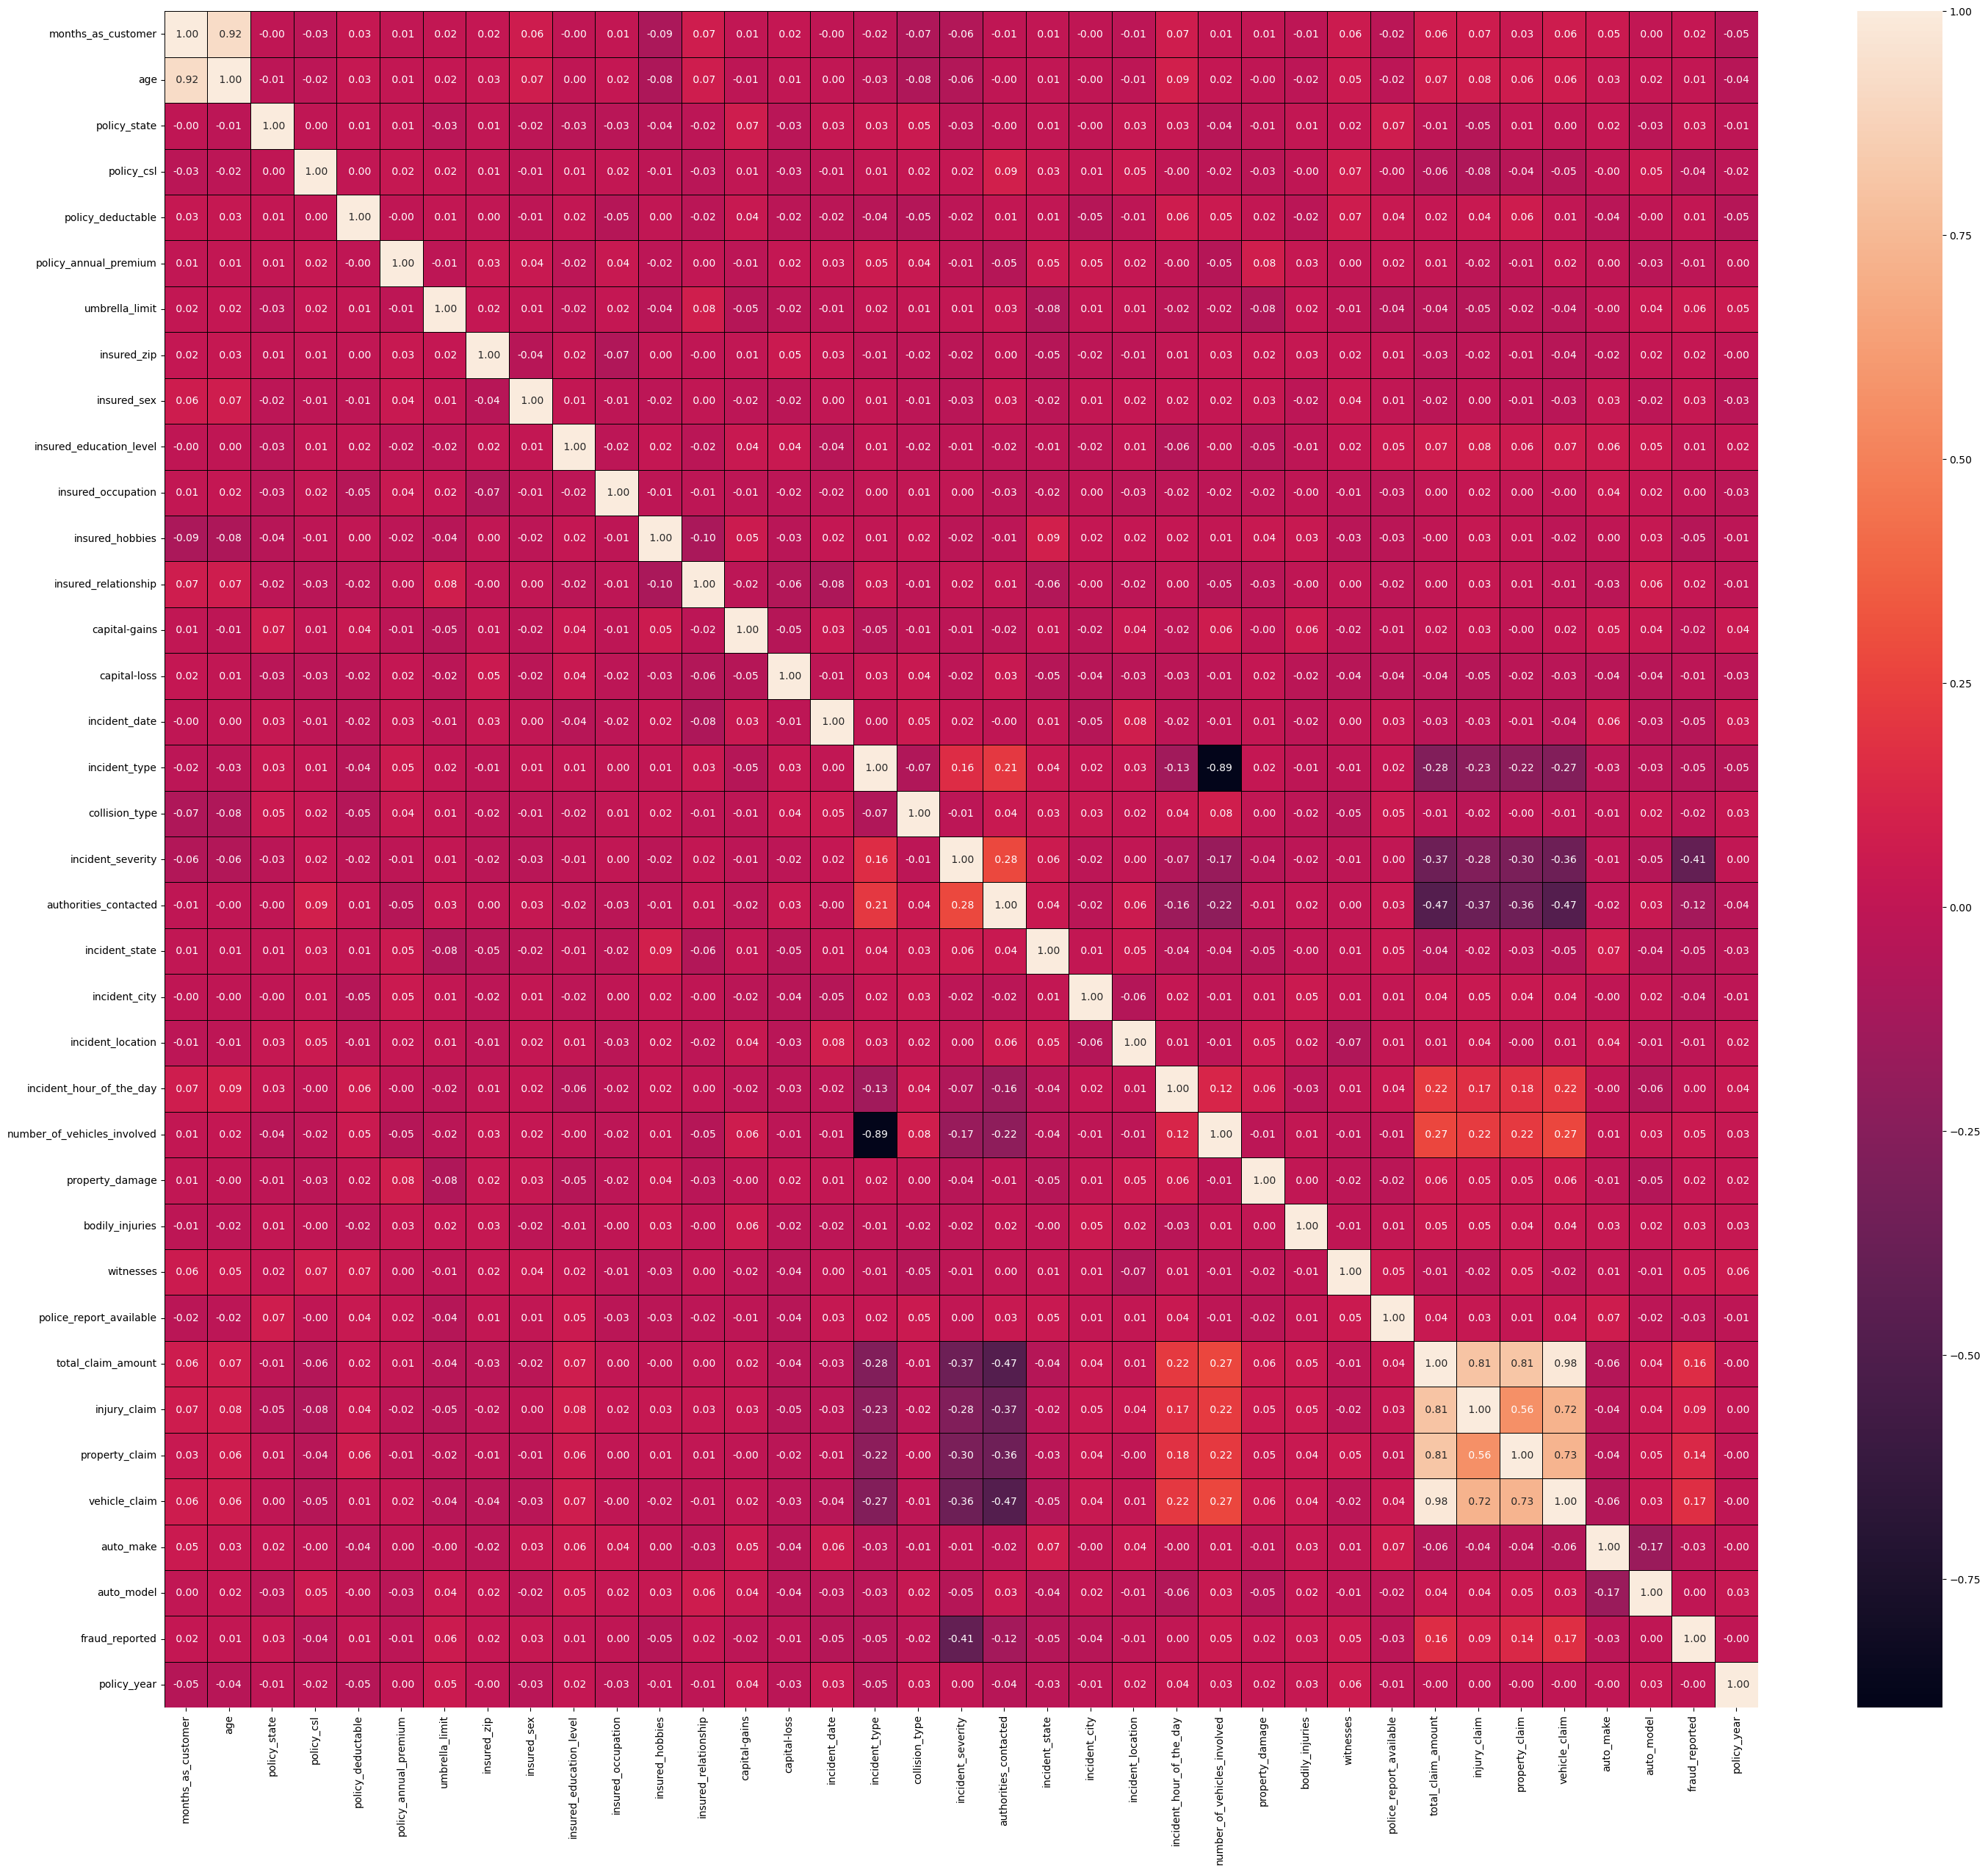

In [85]:
plt.figure(figsize=(35,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt=' .2f' )

Observations:
1) incident_severity is Negatively correlated to target variable. So, it needs to be dropped.
2) number_of_vehicles_involved is also negatively correlated to Dataset and thus will be droppped.

In [86]:
df.drop(['incident_severity'],axis=1,inplace=True)
df.drop(['number_of_vehicles_involved'],axis=1,inplace=True)

## Outlier detection & Treatment

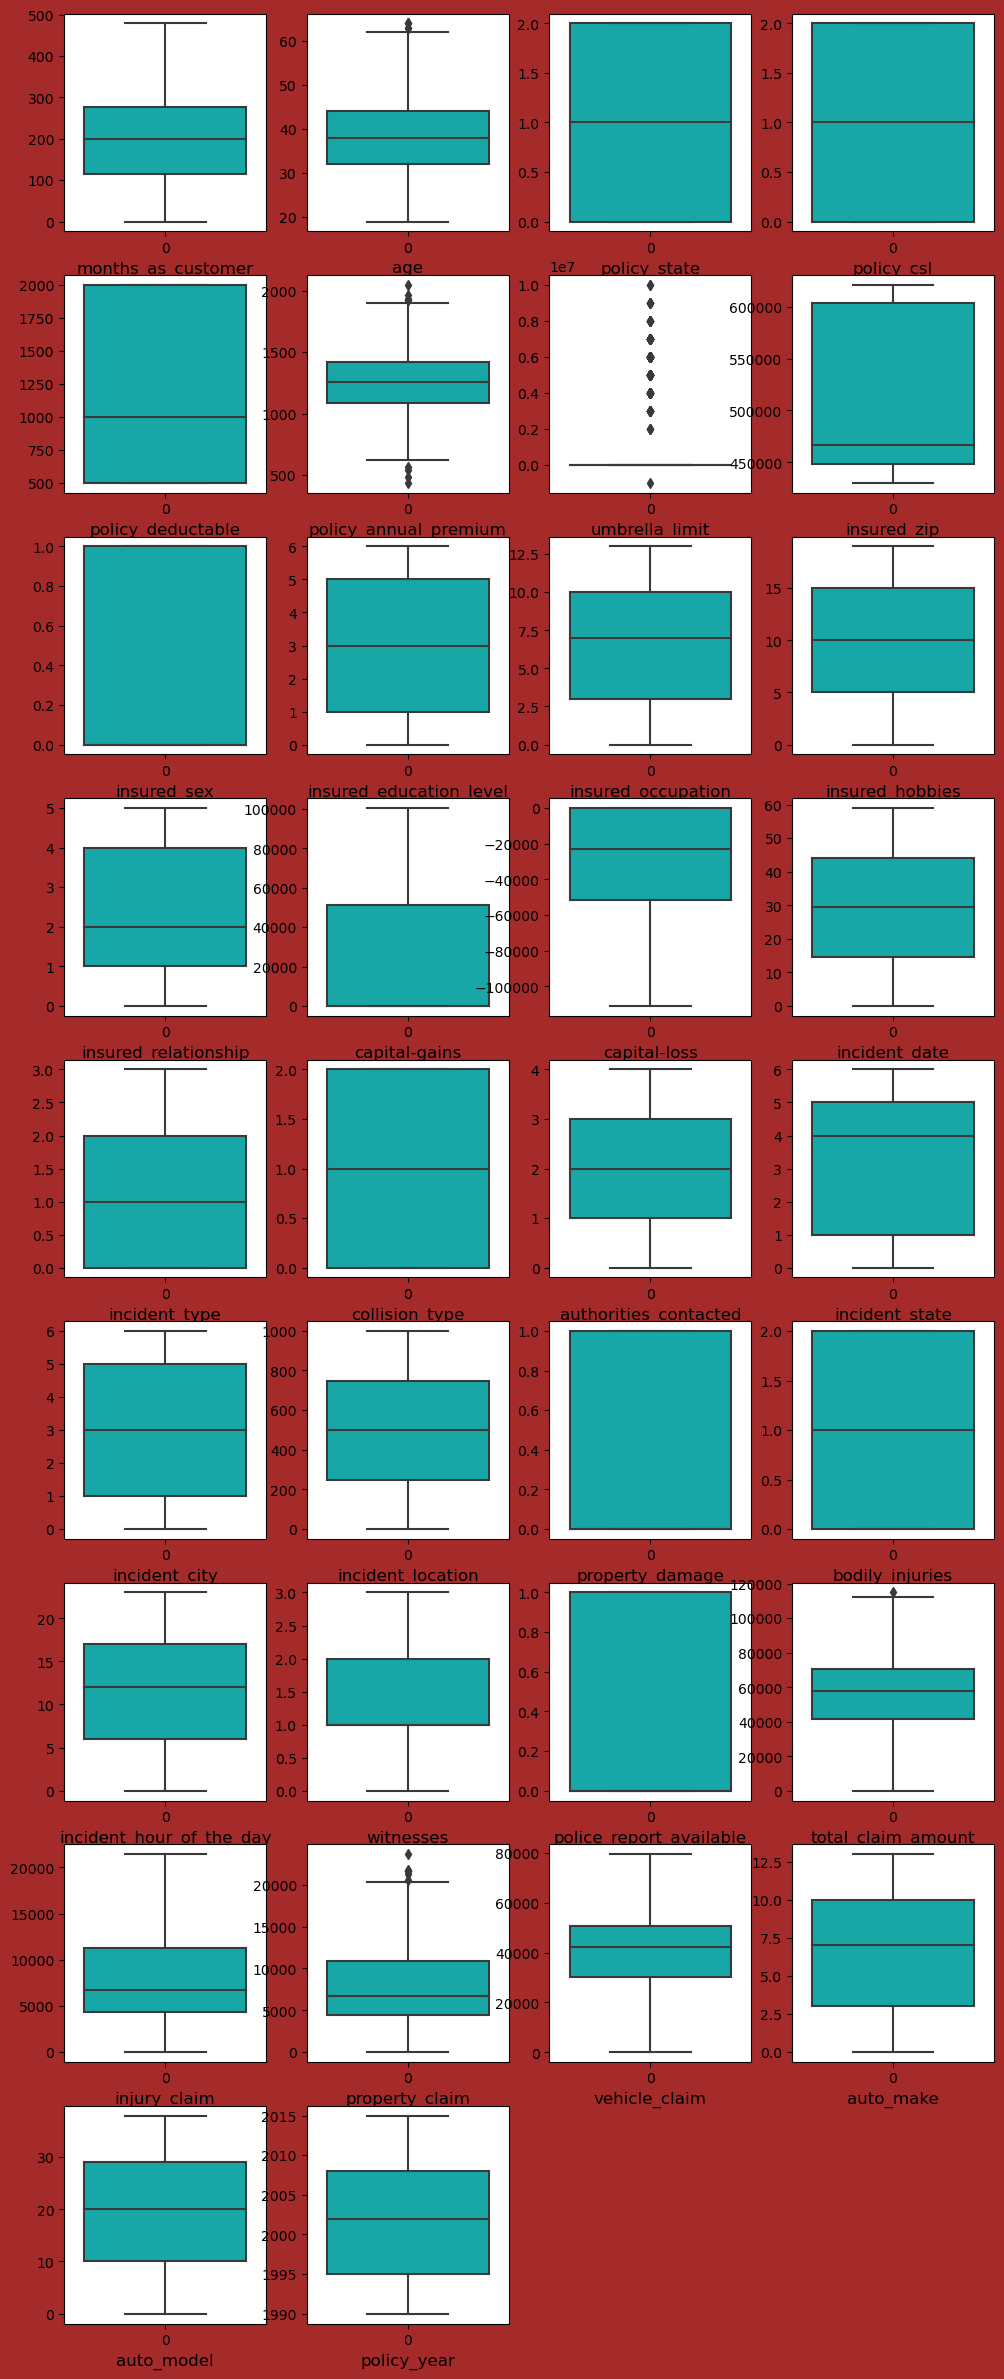

In [88]:
columns=['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'bodily_injuries', 
       'incident_hour_of_the_day','witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'policy_year']
plt.figure(figsize=(12,30),facecolor='brown')
index=1
for column in columns:
    if index <=36:
        ax = plt.subplot(9,4,index)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

In [89]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = ['age', 'property_claim', 'policy_annual_premium', 'umbrella_limit']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores ( 3)
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

## DATASET SKEWNESS

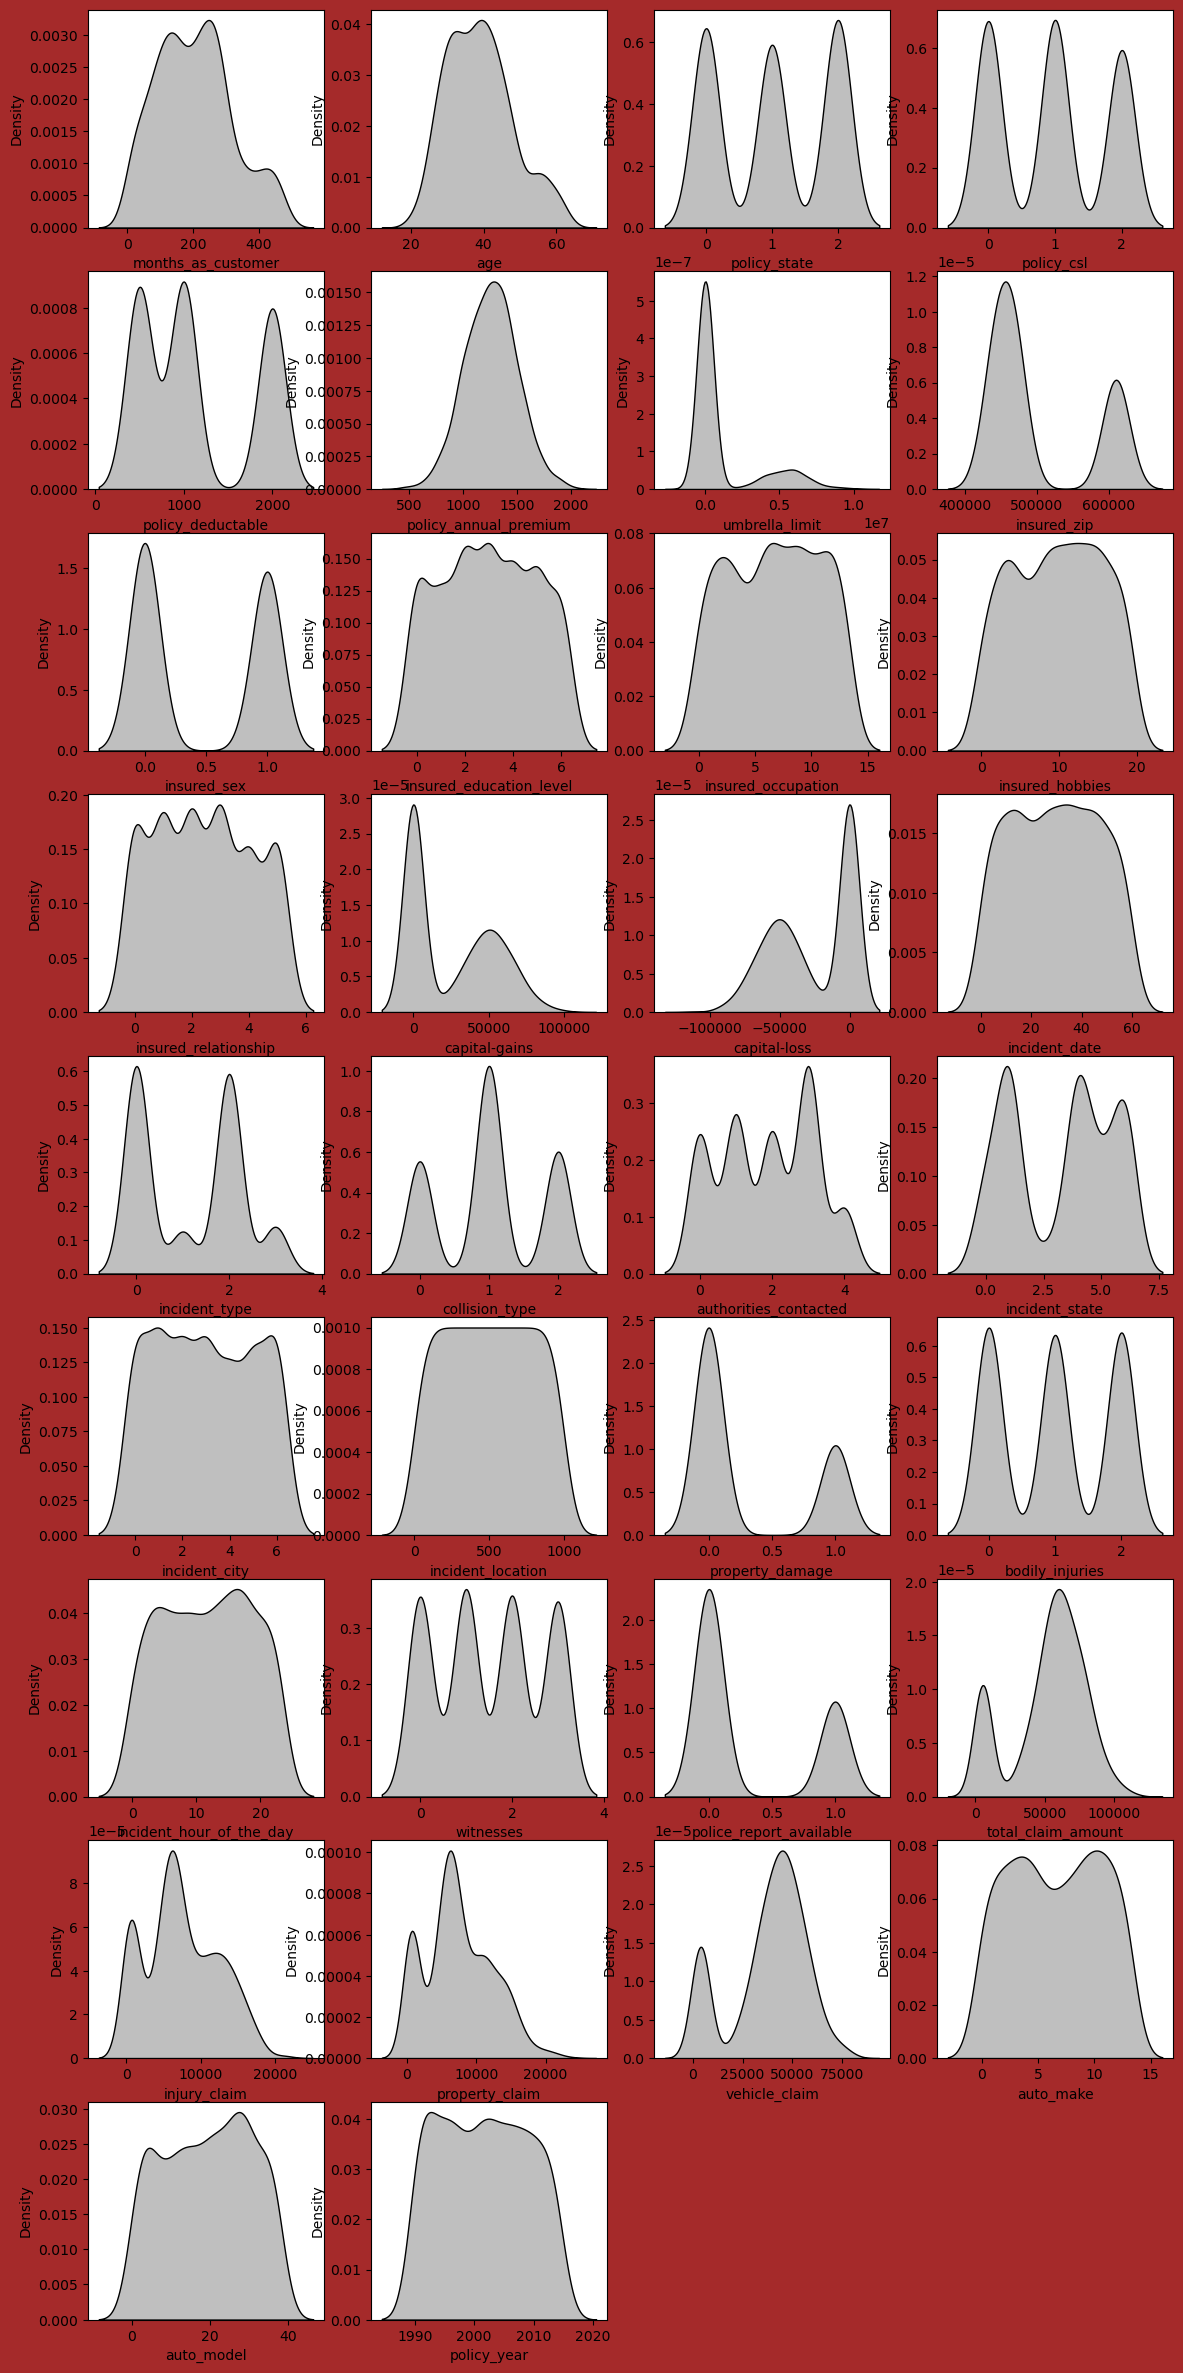

In [90]:
plt.figure(figsize=(14,30), facecolor='brown')
plotnumber=1
for column in columns:
    if plotnumber <=36:
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(df[column], color='k',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [91]:
df.skew()

months_as_customer          0.362177
age                         0.478988
policy_state               -0.026177
policy_csl                  0.088928
policy_deductable           0.477887
policy_annual_premium       0.004402
umbrella_limit              1.806712
insured_zip                 0.816554
insured_sex                 0.148630
insured_education_level    -0.000148
insured_occupation         -0.058881
insured_hobbies            -0.061563
insured_relationship        0.077488
capital-gains               0.478850
capital-loss               -0.391472
incident_date               0.004756
incident_type               0.101507
collision_type             -0.033682
authorities_contacted      -0.034786
incident_state             -0.148865
incident_city               0.049531
incident_location           0.000000
incident_hour_of_the_day   -0.035584
property_damage             0.863806
bodily_injuries             0.014777
witnesses                   0.019636
police_report_available     0.802728
t

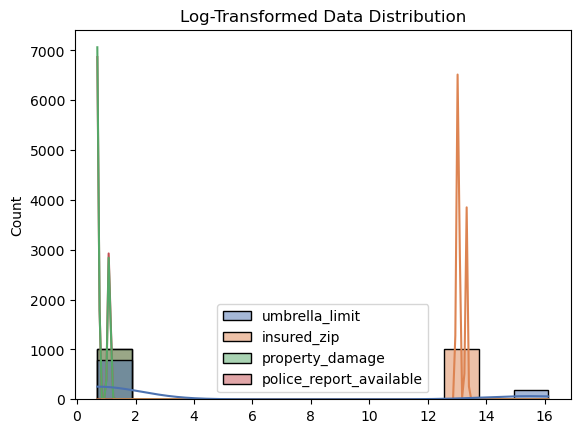

In [92]:
right_skewed = ['umbrella_limit' , 'insured_zip','property_damage','police_report_available' ] #REMOVING SKEWNESS

df[right_skewed] = np.log1p(df[right_skewed]+1)

# Plot the transformed data to check for skewness
sns.histplot(df[right_skewed], kde=True)
plt.title('Log-Transformed Data Distribution')
plt.show()

In [93]:
df.skew()

months_as_customer          0.362177
age                         0.478988
policy_state               -0.026177
policy_csl                  0.088928
policy_deductable           0.477887
policy_annual_premium       0.004402
umbrella_limit              1.494652
insured_zip                 0.782405
insured_sex                 0.148630
insured_education_level    -0.000148
insured_occupation         -0.058881
insured_hobbies            -0.061563
insured_relationship        0.077488
capital-gains               0.478850
capital-loss               -0.391472
incident_date               0.004756
incident_type               0.101507
collision_type             -0.033682
authorities_contacted      -0.034786
incident_state             -0.148865
incident_city               0.049531
incident_location           0.000000
incident_hour_of_the_day   -0.035584
property_damage             0.863806
bodily_injuries             0.014777
witnesses                   0.019636
police_report_available     0.802728
t

In [94]:
X = df.drop(columns = ["fraud_reported"])       #SPLITTING DATASET
y = df["fraud_reported"]

### Standard Scalling

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [100]:
X_scaled=scaler.fit_transform(X)

In [101]:
X['umbrella_limit']=X['umbrella_limit'].fillna(0)

In [102]:
X.isnull().sum()

months_as_customer          0
age                         0
policy_state                0
policy_csl                  0
policy_deductable           0
policy_annual_premium       0
umbrella_limit              0
insured_zip                 0
insured_sex                 0
insured_education_level     0
insured_occupation          0
insured_hobbies             0
insured_relationship        0
capital-gains               0
capital-loss                0
incident_date               0
incident_type               0
collision_type              0
authorities_contacted       0
incident_state              0
incident_city               0
incident_location           0
incident_hour_of_the_day    0
property_damage             0
bodily_injuries             0
witnesses                   0
police_report_available     0
total_claim_amount          0
injury_claim                0
property_claim              0
vehicle_claim               0
auto_make                   0
auto_model                  0
policy_yea

## ML Model

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import  r2_score

In [105]:
for i in range(1,250):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=i, test_size=.2)
    
X_train.shape

(800, 34)

### Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)

Best accuracy is 82.0 on Random_state 218


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=.2, random_state=218)
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred1=lr.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, pred1))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, pred1))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, pred1))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.82


Confusion matrix of Logistics Regression : 
 [[162   0]
 [ 36   2]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       162
           1       1.00      0.05      0.10        38

    accuracy                           0.82       200
   macro avg       0.91      0.53      0.50       200
weighted avg       0.85      0.82      0.75       200



### Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
maxAccu1=0
maxRS1=0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=i, test_size=.2)
    dtc.fit(X_train,y_train)
    y_pred1=dtc.predict(X_test)
    acc1=accuracy_score(y_test,y_pred1)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS1=i
        
print('Best accuracy Score is: ', (maxAccu1)*100 ,'\nAt Random State: ', maxRS1)

Best accuracy Score is:  73.0 
At Random State:  188


In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [112]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), ExtraTreesClassifier()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix for', model.__class__.__name__ + ':' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(y_test, y_pred))
    print('\n')
    
    print('-'*100)

Classification ML Algorithm Evaluation Matrix for SVC:


Accuracy Score :
 0.755


Confusion matrix : 
 [[151   0]
 [ 49   0]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



----------------------------------------------------------------------------------------------------
Classification ML Algorithm Evaluation Matrix for GaussianNB:


Accuracy Score :
 0.635


Confusion matrix : 
 [[114  37]
 [ 36  13]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       151
           1       0.26      0.27      0.26        49

    accuracy                           0.64       200
   macro avg       0.51      0.51  

### Hyperparameter tuning

In [113]:
from sklearn.model_selection import GridSearchCV

In [114]:
param = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced']
}

In [115]:
grid_search = GridSearchCV(LogisticRegression(),param, cv=5, scoring='accuracy',verbose=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.756 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=0.001, class_weight=None, max_iter=100, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=0.00

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='accuracy', verbose=5)

In [116]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 0.001, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [117]:
model = LogisticRegression(C = 0.001, class_weight = None, max_iter = 100, penalty = 'l1', solver = 'liblinear')
model.fit(X_train,y_train)
ypred = model.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, ypred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, ypred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test,ypred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.755


Confusion matrix of Logistics Regression : 
 [[151   0]
 [ 49   0]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       151
           1       0.00      0.00      0.00        49

    accuracy                           0.76       200
   macro avg       0.38      0.50      0.43       200
weighted avg       0.57      0.76      0.65       200



In [118]:
prediction=pd.DataFrame({'predicted values':ypred,'actual values':y_test})
prediction

,predicted values,actual values
221,0,0
905,0,1
942,0,0
888,0,0
711,0,0
...,...,...
669,0,0
950,0,0
724,0,0
72,0,0


## SAVING THE BEST MODEL

In [119]:
import joblib
joblib.dump(model,'Insurance_Claim_Fraud_Detection.pkl')

['Insurance_Claim_Fraud_Detection.pkl']